In [20]:
import numpy as np
import pandas as pd
import random
# import os
import matplotlib.pyplot as plt
import seaborn as sns
# import zipfile
# import sys
# import time
import tensorflow as tf
# import re
# from PIL import Image
# from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.layers import Lambda, Dense, Normalization
# from tensorflow.keras.models import Model
# from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing import image


In [15]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

base_path  = './data/'

categories = {
    0: 'battery', 1: 'clothes', 2: 'glass', 3: 'metal', 
    4: 'organic', 5: 'paper', 6: 'plastic', 7: 'shoes'
}

df = pd.read_csv('./data/waste_classification.csv')
print('Number of elements =', len(df))

Number of elements = 23871


In [16]:
df.head()

,filename,category,category_name
0,clothes/clothes4968.jpg,1,clothes
1,organic/organic_011260_photo.jpg,4,organic
2,plastic/R_597.jpg,6,plastic
3,clothes/clothes4851.jpg,1,clothes
4,organic/organic_001994_photo.jpg,4,organic


In [3]:
# model = tf.keras.models.load_model('./models/cnn_model_batch_1.h5')
# model = tf.keras.models.load_model('./models/cnn_model_batch_10.h5')
# model = tf.keras.models.load_model('./models/cnn_model_batch_25.h5')
# model = tf.keras.models.load_model('./models/mobilenetv2/model01_batch_04')
# model = tf.keras.models.load_model('./models/mobilenetv2/model01_batch_10')
# model = tf.keras.models.load_model('./models/mobilenetv2/model02_batch_20')
# model = tf.keras.models.load_model('./models/mobilenetv2/model03_batch_20')
model = tf.keras.models.load_model('./models/mobilenetv2/model03_batch_25')
# model = tf.keras.models.load_model('./models/mobilenetv2/model03_batch_30')


In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                             

In [17]:
# Change the categories from numbers to names
df["category"] = df["category"].replace(categories)

# Split the data into train, validation, and test sets
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)
validate_df, test_df = train_test_split(validate_df, test_size=0.5, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

print('Train size =', total_train, 'Validate size =', total_validate, 'Test size =', test_df.shape[0])

Train size = 19096 Validate size = 2387 Test size = 2388


In [18]:
test_df

,filename,category,category_name
0,glass/white-glass478.jpg,glass,glass
1,organic/organic_011827_photo.jpg,organic,organic
2,paper/paper457.jpg,paper,paper
3,clothes/clothes4914.jpg,clothes,clothes
4,glass/green-glass364.jpg,glass,glass
...,...,...,...
2383,metal/R_2011.jpg,metal,metal
2384,battery/battery289.jpg,battery,battery
2385,organic/O_9036.jpg,organic,organic
2386,glass/white-glass650.jpg,glass,glass


In [19]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=base_path,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=1,
    shuffle=False
)

filenames = test_generator.filenames
nb_samples = len(filenames)


# _, accuracy = model.evaluate(test_generator, steps=nb_samples)

# print('Accuracy on test set =', round((accuracy * 100), 2), '%')

Found 2388 validated image filenames belonging to 8 classes.


clothes/clothes4440.jpg
1/1 [==============================] - 0s 38ms/step
1
clothes


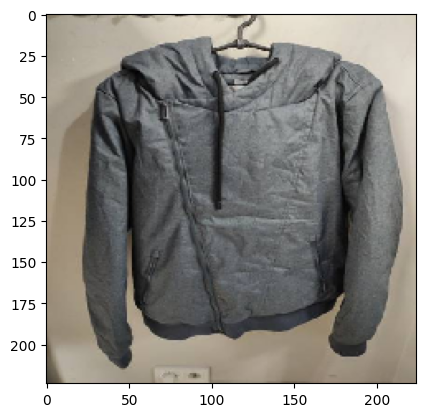

In [25]:
random_row = random.randint(0, len(df)-1)
sample = df.iloc[random_row]
img_path = base_path +sample['filename']
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

print(sample['filename'])
plt.imshow(img)

preds = model.predict(x)
# print(preds)

preds_max=np.argmax(preds)
print(preds_max)
print(categories[preds_max])